In [21]:

import numpy as np
import pandas as pd
import networkx as nx
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm_notebook as tqdm
%matplotlib inline


## BTC transactions

In [2]:
data_matrix = pd.read_csv('Data.csv',names = ['From','To','Rating','Timestamp'])

In [3]:
data_matrix.head()

,From,To,Rating,Timestamp
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


# Graph

In [15]:
G = nx.DiGraph()
edges=[(data_matrix["From"][i],data_matrix["To"][i],data_matrix["Rating"][i]/10) for i in data_matrix.index]
edges

[(6, 2, 0.4),
 (6, 5, 0.2),
 (1, 15, 0.1),
 (4, 3, 0.7),
 (13, 16, 0.8),
 (13, 10, 0.8),
 (7, 5, 0.1),
 (2, 21, 0.5),
 (2, 20, 0.5),
 (21, 2, 0.5),
 (21, 1, 0.8),
 (21, 10, 0.8),
 (21, 8, 0.9),
 (21, 3, 0.7),
 (17, 3, 0.5),
 (17, 23, 0.1),
 (10, 1, 0.8),
 (10, 6, 0.7),
 (10, 21, 0.8),
 (10, 8, 0.1),
 (10, 25, 1.0),
 (10, 2, 0.7),
 (10, 3, 0.7),
 (4, 26, 0.1),
 (26, 4, 0.1),
 (5, 1, 0.3),
 (5, 6, 0.3),
 (5, 7, 0.1),
 (1, 5, 0.4),
 (6, 4, 0.2),
 (4, 6, 0.5),
 (2, 4, 0.5),
 (17, 28, 0.1),
 (17, 13, 0.2),
 (13, 17, 0.2),
 (13, 29, 0.2),
 (29, 13, 0.2),
 (17, 20, 0.2),
 (4, 31, 0.1),
 (31, 4, 0.2),
 (32, 6, 0.1),
 (13, 1, 0.8),
 (7, 34, 0.1),
 (34, 7, 0.1),
 (32, 1, 0.1),
 (1, 32, 0.1),
 (1, 34, 0.1),
 (34, 1, 0.1),
 (34, 13, 0.1),
 (13, 34, 0.1),
 (6, 7, 0.5),
 (7, 6, 0.3),
 (1, 17, 0.9),
 (1, 31, 0.2),
 (31, 1, 0.3),
 (35, 6, 0.2),
 (1, 13, 0.3),
 (36, 37, 0.1),
 (37, 36, 0.1),
 (35, 1, 0.1),
 (17, 1, 0.9),
 (8, 1, 0.3),
 (7, 29, 0.2),
 (1, 20, 0.2),
 (37, 44, 0.1),
 (44, 37, 0.1),
 (39, 

In [16]:
for edge in edges:
    G.add_edge(edge[0],edge[1],weight=edge[2])

In [17]:
print(len(G.edges()))
print(len(G.nodes()))

35592
5881


## Feature Engineering

In [22]:
def initialize_scores(G):
    fairness = {}
    goodness = {}
    
    nodes = G.nodes()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    return fairness, goodness

# Features

In [25]:
def Fariness_Goodness(G):
    fairness, goodness = initialize_scores(G)
    
    nodes = G.nodes()

    while True:
        df = 0
        dg = 0

        
        for node in tqdm(nodes):
            inedges = G.in_edges(node, data='weight')
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]

            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass

        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        
        if df < math.pow(10, -6) and dg < math.pow(10, -6):
            break
        
    
    return fairness, goodness

In [26]:
# these two dictionaries have the required scores
fairness, goodness = Fariness_Goodness(G)

/tmp/ipykernel_674338/3518208791.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for node in tqdm(nodes):


  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

  0%|          | 0/5881 [00:00<?, ?it/s]

# Appending Results to Matrix

## Fairness to Matrix

In [27]:
def Fairness(row): return fairness[row]
df=data_matrix.copy()
df['fairness'] = df['From'].apply(Fairness)

### Goodness to Matrix 

In [28]:
def Goodness(row): return goodness[row]
df['goodness'] = df['To'].apply(Goodness)

In [29]:
df.head()

,From,To,Rating,Timestamp,fairness,goodness
0,6,2,4,1.289242e+09,0.895726,0.269531
1,6,5,2,1.289242e+09,0.895726,0.214168
2,1,15,1,1.289243e+09,0.922436,0.144465
3,4,3,7,1.289245e+09,0.891287,-0.035796
4,13,16,8,1.289254e+09,0.945563,0.756450


# Betweenness

In [30]:
from tqdm import tqdm_notebook as tqdm

def betweenness_centrality(G):
    
    V=G.nodes()
    pbar=tqdm(total=len(V))
    btw={}
    for s in V:
        btw[s]=0.0
    for s  in V:
        pbar.update(1)
        #single-source shortest paths problem
        #initialization
        pred={}
        dist={}
        sigma={}
        Q=[]
        stack=[]
        for w in V:
            pred[w]=[]
            dist[w]=-1
            sigma[w]=0
            
        dist[s]=0
        sigma[s]=1
        Q.append(s)
        
        while len(Q)!=0:
            v=Q.pop(0)
            stack.append(v)
            for w in G.neighbors(v):
                #path discovery
                if dist[w]==-1:
                    dist[w]=dist[v]+1
                    
                    Q.append(w)
                #path counting
                if dist[w]==dist[v]+1:
                    sigma[w]=sigma[w]+sigma[v]
                    dist[w]=dist[v]+1
                    
                    pred[w].append(v)
        #accumulation
        delta={}
        for v in V:
            delta[v]=0
        while len(stack)!=0:
            w=stack.pop()
            for v in pred[w]:
                delta[v]=delta[v]+(sigma[v]/sigma[w])*(1+delta[w])
            if w !=s:
                btw[w]=btw[w]+delta[w]
        
    return btw
            
           

In [31]:
G2 = G.to_undirected()

In [32]:
len(nx.Graph(G).edges)

21492

In [33]:
btw_centrality=betweenness_centrality(G)

/tmp/ipykernel_674338/4108008526.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar=tqdm(total=len(V))


  0%|          | 0/5881 [00:00<?, ?it/s]

In [34]:
max_value=max(btw_centrality.values())

### Add Betweenness to Matrix

In [35]:
df["btw_From"]=0.
df["btw_To"]=0.
df["btw"]=0.

for i in df.index:
    df["btw"][i]=((btw_centrality[(df["From"][i])]+btw_centrality[(df["To"][i])])/2)/max_value
    df["btw_From"][i]=btw_centrality[(df["From"][i])]/max_value
    df["btw_To"][i]=btw_centrality[(df["To"][i])]/max_value

/tmp/ipykernel_674338/2035661013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["btw"][i]=((btw_centrality[(df["From"][i])]+btw_centrality[(df["To"][i])])/2)/max_value
/tmp/ipykernel_674338/2035661013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["btw_From"][i]=btw_centrality[(df["From"][i])]/max_value
/tmp/ipykernel_674338/2035661013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["btw_To"][i]=btw_centrality[(d

# Closenness

In [37]:
closeenness=nx.algorithms.closeness_centrality(G)

In [38]:
df["C_From"]=0.
df["C_To"]=0.
df["C"]=0.

for i in df.index:
    df["C"][i]=((closeenness[(df["From"][i])]+closeenness[(df["To"][i])])/2)
    df["C_From"][i]=closeenness[(df["From"][i])]
    df["C_To"][i]=closeenness[(df["To"][i])]

/tmp/ipykernel_674338/2958500815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C"][i]=((closeenness[(df["From"][i])]+closeenness[(df["To"][i])])/2)
/tmp/ipykernel_674338/2958500815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_From"][i]=closeenness[(df["From"][i])]
/tmp/ipykernel_674338/2958500815.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_To"][i]=closeenness[(df["To"][i])]


### Degree Centrality

In [39]:
df["DC_From"]=0.
df["DC_To"]=0.
df["DC"]=0.
degree_centrality=nx.degree_centrality(G)

for i in df.index:
    df["DC"][i]=((degree_centrality[(df["From"][i])]+degree_centrality[(df["To"][i])])/2)
    df["DC_From"][i]=degree_centrality[(df["From"][i])]
    df["DC_To"][i]=degree_centrality[(df["To"][i])]

/tmp/ipykernel_674338/3483378970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DC"][i]=((degree_centrality[(df["From"][i])]+degree_centrality[(df["To"][i])])/2)
/tmp/ipykernel_674338/3483378970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DC_From"][i]=degree_centrality[(df["From"][i])]
/tmp/ipykernel_674338/3483378970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DC_To"][i]=degree_centrality[(df["To"][i])

# Applying SL Models

## Creating X and y 

In [40]:
df.head()

,From,To,Rating,Timestamp,fairness,goodness,btw_From,btw_To,btw,C_From,C_To,C,DC_From,DC_To,DC
0,6,2,4,1.289242e+09,0.895726,0.269531,0.018029,0.014119,0.016074,0.296063,0.265506,0.280785,0.014286,0.014626,0.014456
1,6,5,2,1.289242e+09,0.895726,0.214168,0.018029,0.000000,0.009015,0.296063,0.242396,0.269230,0.014286,0.001020,0.007653
2,1,15,1,1.289243e+09,0.922436,0.144465,0.316636,0.004795,0.160715,0.330994,0.251884,0.291439,0.075000,0.004762,0.039881
3,4,3,7,1.289245e+09,0.891287,-0.035796,0.045986,0.000000,0.022993,0.278002,0.262725,0.270364,0.019898,0.003571,0.011735
4,13,16,8,1.289254e+09,0.945563,0.756450,0.226833,0.000000,0.113416,0.320739,0.229434,0.275087,0.068197,0.000170,0.034184


In [41]:
df[['From', 'To', 'Rating', 'fairness', 'goodness', 'btw',
       'btw_From', 'btw_To', 'C_From', 'C_To', 'C', 'DC_From', 'DC_To', 'DC']].head(5)

,From,To,Rating,fairness,goodness,btw,btw_From,btw_To,C_From,C_To,C,DC_From,DC_To,DC
0,6,2,4,0.895726,0.269531,0.016074,0.018029,0.014119,0.296063,0.265506,0.280785,0.014286,0.014626,0.014456
1,6,5,2,0.895726,0.214168,0.009015,0.018029,0.000000,0.296063,0.242396,0.269230,0.014286,0.001020,0.007653
2,1,15,1,0.922436,0.144465,0.160715,0.316636,0.004795,0.330994,0.251884,0.291439,0.075000,0.004762,0.039881
3,4,3,7,0.891287,-0.035796,0.022993,0.045986,0.000000,0.278002,0.262725,0.270364,0.019898,0.003571,0.011735
4,13,16,8,0.945563,0.756450,0.113416,0.226833,0.000000,0.320739,0.229434,0.275087,0.068197,0.000170,0.034184


In [42]:

X=np.array(df[['fairness', 'goodness', 'btw',
       'btw_From', 'btw_To', 'C_From', 'C_To', 'C', 'DC_From', 'DC_To', 'DC']])
y=np.array(df["Rating"])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 20)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 20)

## Splitting data into test , train and validation

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 20)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 20)

In [44]:
ss={
    
    1:["From","To"],
    2: ['fairness', 'goodness', 'btw',
       'btw_From', 'btw_To', 'C_From', 'C_To', 'C', 'DC_From', 'DC_To', 'DC'],
    3:['fairness', 'goodness'],
    4:['fairness', 'goodness', 'btw',
       'btw_From', 'btw_To'],
    5:['fairness', 'goodness', 'C_From', 'C_To', 'C', 'DC_From', 'DC_To', 'DC'],
    6:[
       'btw_From', 'btw_To', 'C_From', 'C_To', 'C', 'DC_From', 'DC_To', 'DC'],
    7: [ 'DC_From', 'DC_To', 'DC']
    
}

In [45]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

2022-05-19 08:31:18.868787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 08:31:18.868813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [52]:
df.loc[:30000]

,From,To,Rating,Timestamp,fairness,goodness,btw_From,btw_To,btw,C_From,C_To,C,DC_From,DC_To,DC
0,6,2,4,1.289242e+09,0.895726,0.269531,0.018029,0.014119,0.016074,0.296063,0.265506,0.280785,0.014286,0.014626,0.014456
1,6,5,2,1.289242e+09,0.895726,0.214168,0.018029,0.000000,0.009015,0.296063,0.242396,0.269230,0.014286,0.001020,0.007653
2,1,15,1,1.289243e+09,0.922436,0.144465,0.316636,0.004795,0.160715,0.330994,0.251884,0.291439,0.075000,0.004762,0.039881
3,4,3,7,1.289245e+09,0.891287,-0.035796,0.045986,0.000000,0.022993,0.278002,0.262725,0.270364,0.019898,0.003571,0.011735
4,13,16,8,1.289254e+09,0.945563,0.756450,0.226833,0.000000,0.113416,0.320739,0.229434,0.275087,0.068197,0.000170,0.034184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,4559,5205,-10,1.387183e+09,0.922255,-0.921246,0.048925,0.000000,0.024462,0.290045,0.237379,0.263712,0.032143,0.000510,0.016327
29997,2045,5205,-10,1.387183e+09,0.909661,-0.921246,0.096884,0.000000,0.048442,0.302241,0.237379,0.269810,0.050680,0.000510,0.025595
29998,2045,5197,-10,1.387184e+09,0.909661,-0.654554,0.096884,0.000858,0.048871,0.302241,0.238258,0.270249,0.050680,0.002891,0.026786
29999,2045,5198,-10,1.387184e+09,0.909661,-0.615708,0.096884,0.000800,0.048842,0.302241,0.237782,0.270011,0.050680,0.002551,0.026616


In [93]:
# x_train = features, y_train = ratings
x_train, y_train = df.loc[:30000].drop(columns=["Rating"]),df.loc[:30000]["Rating"]
x_test, y_test = df.loc[30000:].drop(columns=["Rating"]),df.loc[30000:]["Rating"]

## Using NN1

In [94]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [66]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.001
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [67]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
188/188 [==============================] - 2s 8ms/step - loss: 0.2048 - mean_squared_logarithmic_error: 0.2045 - val_loss: 0.2570 - val_mean_squared_logarithmic_error: 0.2597
Epoch 2/10
188/188 [==============================] - 1s 8ms/step - loss: 0.1623 - mean_squared_logarithmic_error: 0.1622 - val_loss: 0.2434 - val_mean_squared_logarithmic_error: 0.2457
Epoch 3/10
188/188 [==============================] - 1s 8ms/step - loss: 0.1596 - mean_squared_logarithmic_error: 0.1597 - val_loss: 0.2630 - val_mean_squared_logarithmic_error: 0.2656
Epoch 4/10
188/188 [==============================] - 1s 8ms/step - loss: 0.1559 - mean_squared_logarithmic_error: 0.1559 - val_loss: 0.2426 - val_mean_squared_logarithmic_error: 0.2450
Epoch 5/10
188/188 [==============================] - 1s 8ms/step - loss: 0.1541 - mean_squared_logarithmic_error: 0.1541 - val_loss: 0.2223 - val_mean_squared_logarithmic_error: 0.2240
Epoch 6/10
188/188 [==============================] - 1s 8ms/step - lo

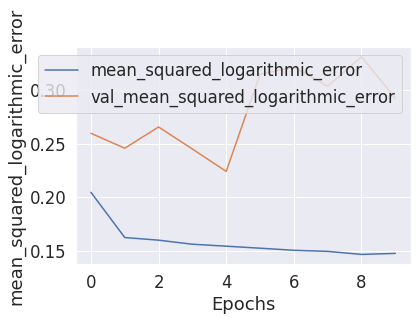

In [68]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [69]:
x_test['prediction'] = model.predict(x_test_scaled)

In [70]:
x_test

,From,To,Timestamp,fairness,goodness,btw_From,btw_To,btw,C_From,C_To,C,DC_From,DC_To,DC,prediction
30000,4559,5206,1.387188e+09,0.922255,-0.243809,0.048925,0.000000,0.024462,0.290045,0.238523,0.264284,0.032143,0.000510,0.016327,0.839857
30001,4172,5206,1.387188e+09,0.860079,-0.243809,0.294827,0.000000,0.147414,0.313895,0.238523,0.276209,0.082653,0.000510,0.041582,0.812081
30002,2045,5206,1.387188e+09,0.909661,-0.243809,0.096884,0.000000,0.048442,0.302241,0.238523,0.270382,0.050680,0.000510,0.025595,0.628481
30003,5186,5193,1.387206e+09,0.881214,-0.679075,0.001422,0.001799,0.001611,0.217999,0.238586,0.228292,0.001871,0.003401,0.002636,0.312962
30004,2125,5193,1.387207e+09,0.931823,-0.679075,0.292961,0.001799,0.147380,0.309157,0.238586,0.273872,0.098129,0.003401,0.050765,0.098959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35587,4499,1810,1.453612e+09,0.924509,0.103462,0.012046,0.348557,0.180302,0.283379,0.317161,0.300270,0.013095,0.121599,0.067347,2.789482
35588,2731,3901,1.453679e+09,0.902977,0.170051,0.001214,0.000214,0.000714,0.244937,0.234952,0.239944,0.002381,0.002041,0.002211,2.532463
35589,2731,4897,1.453679e+09,0.902977,0.175835,0.001214,0.001322,0.001268,0.244937,0.202711,0.223824,0.002381,0.001361,0.001871,2.249707
35590,13,1128,1.453680e+09,0.945563,0.123803,0.226833,0.000689,0.113761,0.320739,0.238332,0.279536,0.068197,0.002381,0.035289,1.559875


In [72]:
x_test["NN1_DIFF"]=y_test-round(x_test['prediction'])
x_test

,From,To,Timestamp,fairness,goodness,btw_From,btw_To,btw,C_From,C_To,C,DC_From,DC_To,DC,prediction,NN1_DIFF
30000,4559,5206,1.387188e+09,0.922255,-0.243809,0.048925,0.000000,0.024462,0.290045,0.238523,0.264284,0.032143,0.000510,0.016327,0.839857,0.0
30001,4172,5206,1.387188e+09,0.860079,-0.243809,0.294827,0.000000,0.147414,0.313895,0.238523,0.276209,0.082653,0.000510,0.041582,0.812081,0.0
30002,2045,5206,1.387188e+09,0.909661,-0.243809,0.096884,0.000000,0.048442,0.302241,0.238523,0.270382,0.050680,0.000510,0.025595,0.628481,-11.0
30003,5186,5193,1.387206e+09,0.881214,-0.679075,0.001422,0.001799,0.001611,0.217999,0.238586,0.228292,0.001871,0.003401,0.002636,0.312962,-10.0
30004,2125,5193,1.387207e+09,0.931823,-0.679075,0.292961,0.001799,0.147380,0.309157,0.238586,0.273872,0.098129,0.003401,0.050765,0.098959,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35587,4499,1810,1.453612e+09,0.924509,0.103462,0.012046,0.348557,0.180302,0.283379,0.317161,0.300270,0.013095,0.121599,0.067347,2.789482,-2.0
35588,2731,3901,1.453679e+09,0.902977,0.170051,0.001214,0.000214,0.000714,0.244937,0.234952,0.239944,0.002381,0.002041,0.002211,2.532463,2.0
35589,2731,4897,1.453679e+09,0.902977,0.175835,0.001214,0.001322,0.001268,0.244937,0.202711,0.223824,0.002381,0.001361,0.001871,2.249707,3.0
35590,13,1128,1.453680e+09,0.945563,0.123803,0.226833,0.000689,0.113761,0.320739,0.238332,0.279536,0.068197,0.002381,0.035289,1.559875,-1.0


# Based DNN network

In [79]:
import keras

In [95]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = x_train.shape[1], activation='relu'),  
    keras.layers.Dense(512, input_dim = x_train.shape[1], activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Initial_model",)
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7680      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 500,481
Trainable params: 500,481
Non-t

In [116]:
import keras.optimizers
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='mean_absolute_error',metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(x_test, y_test), 
                    verbose=1)

Epoch 1/200
30/30 [==============================] - 1s 22ms/step - loss: 1.6990 - accuracy: 0.5736 - val_loss: 1.9084 - val_accuracy: 0.5079
Epoch 2/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6984 - accuracy: 0.5736 - val_loss: 1.9032 - val_accuracy: 0.5079
Epoch 3/200
30/30 [==============================] - 1s 19ms/step - loss: 1.6972 - accuracy: 0.5736 - val_loss: 1.9015 - val_accuracy: 0.5079
Epoch 4/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6954 - accuracy: 0.5736 - val_loss: 1.9055 - val_accuracy: 0.5079
Epoch 5/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6963 - accuracy: 0.5736 - val_loss: 1.9025 - val_accuracy: 0.5079
Epoch 6/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6946 - accuracy: 0.5736 - val_loss: 1.9012 - val_accuracy: 0.5079
Epoch 7/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6951 - accuracy: 0.5736 - val_loss: 1.9002 - val_accuracy: 0.5079
Epoch 

30/30 [==============================] - 0s 16ms/step - loss: 1.6951 - accuracy: 0.5736 - val_loss: 1.9002 - val_accuracy: 0.5079
Epoch 59/200
30/30 [==============================] - 0s 16ms/step - loss: 1.6944 - accuracy: 0.5736 - val_loss: 1.9010 - val_accuracy: 0.5079
Epoch 60/200
30/30 [==============================] - 1s 19ms/step - loss: 1.6944 - accuracy: 0.5736 - val_loss: 1.9008 - val_accuracy: 0.5079
Epoch 61/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6942 - accuracy: 0.5736 - val_loss: 1.9027 - val_accuracy: 0.5079
Epoch 62/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6959 - accuracy: 0.5736 - val_loss: 1.9051 - val_accuracy: 0.5079
Epoch 63/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6954 - accuracy: 0.5736 - val_loss: 1.9029 - val_accuracy: 0.5079
Epoch 64/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6946 - accuracy: 0.5736 - val_loss: 1.9009 - val_accuracy: 0.5079
Epoch 65/200

30/30 [==============================] - 1s 19ms/step - loss: 1.6947 - accuracy: 0.5736 - val_loss: 1.9031 - val_accuracy: 0.5079
Epoch 116/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6936 - accuracy: 0.5736 - val_loss: 1.9015 - val_accuracy: 0.5079
Epoch 117/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6962 - accuracy: 0.5736 - val_loss: 1.9031 - val_accuracy: 0.5079
Epoch 118/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6959 - accuracy: 0.5736 - val_loss: 1.9002 - val_accuracy: 0.5079
Epoch 119/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6942 - accuracy: 0.5736 - val_loss: 1.9021 - val_accuracy: 0.5079
Epoch 120/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6942 - accuracy: 0.5736 - val_loss: 1.9010 - val_accuracy: 0.5079
Epoch 121/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6955 - accuracy: 0.5736 - val_loss: 1.8999 - val_accuracy: 0.5079
Epoch 

Epoch 172/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6940 - accuracy: 0.5736 - val_loss: 1.9024 - val_accuracy: 0.5079
Epoch 173/200
30/30 [==============================] - 1s 19ms/step - loss: 1.6947 - accuracy: 0.5736 - val_loss: 1.9022 - val_accuracy: 0.5079
Epoch 174/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6939 - accuracy: 0.5736 - val_loss: 1.9003 - val_accuracy: 0.5079
Epoch 175/200
30/30 [==============================] - 1s 17ms/step - loss: 1.6962 - accuracy: 0.5736 - val_loss: 1.9026 - val_accuracy: 0.5079
Epoch 176/200
30/30 [==============================] - 1s 18ms/step - loss: 1.6955 - accuracy: 0.5736 - val_loss: 1.9026 - val_accuracy: 0.5079
Epoch 177/200
30/30 [==============================] - 1s 19ms/step - loss: 1.6943 - accuracy: 0.5736 - val_loss: 1.8999 - val_accuracy: 0.5079
Epoch 178/200
30/30 [==============================] - 1s 19ms/step - loss: 1.6944 - accuracy: 0.5736 - val_loss: 1.9015 - val_accuracy:

In [117]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


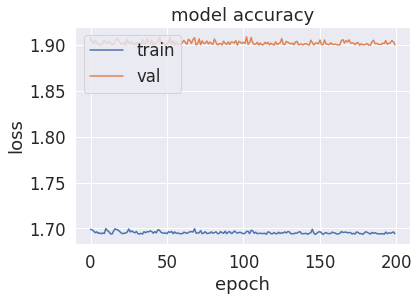

In [120]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
'''

Our first model turned out to be quite a failure, 
we have horrendous overfitting on Training data and there is a a gap
betweeen Validation Loss and train loss for the entire epochs.


'''

# NN3

In [123]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = x_train.shape[1], activation='relu'),  
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.3),
keras.layers.Dense(units=256,activation='relu'), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256,activation='relu'), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Dropout",)

In [124]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='mean_absolute_error',metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(x_test, y_test), 
                    verbose=1)

Epoch 1/200
30/30 [==============================] - 1s 31ms/step - loss: 10848780.0000 - accuracy: 0.2852 - val_loss: 351564.5312 - val_accuracy: 0.5079
Epoch 2/200
30/30 [==============================] - 1s 27ms/step - loss: 1261530.7500 - accuracy: 0.2807 - val_loss: 70716.6328 - val_accuracy: 0.0000e+00
Epoch 3/200
30/30 [==============================] - 1s 27ms/step - loss: 670962.8125 - accuracy: 0.2833 - val_loss: 9038.5146 - val_accuracy: 0.5079
Epoch 4/200
30/30 [==============================] - 1s 27ms/step - loss: 394301.4688 - accuracy: 0.2849 - val_loss: 16049.4736 - val_accuracy: 0.0000e+00
Epoch 5/200
30/30 [==============================] - 1s 27ms/step - loss: 182111.2188 - accuracy: 0.2626 - val_loss: 2.5859 - val_accuracy: 0.0000e+00
Epoch 6/200
30/30 [==============================] - 1s 26ms/step - loss: 50604.5195 - accuracy: 0.1069 - val_loss: 2.4862 - val_accuracy: 0.0000e+00
Epoch 7/200
30/30 [==============================] - 1s 27ms/step - loss: 20078.1602

Epoch 57/200
30/30 [==============================] - 1s 28ms/step - loss: 476.5392 - accuracy: 0.5725 - val_loss: 1.9002 - val_accuracy: 0.5079
Epoch 58/200
30/30 [==============================] - 1s 27ms/step - loss: 734.9467 - accuracy: 0.5719 - val_loss: 1.9004 - val_accuracy: 0.5079
Epoch 59/200
30/30 [==============================] - 1s 27ms/step - loss: 467.8140 - accuracy: 0.5726 - val_loss: 1.9007 - val_accuracy: 0.5079
Epoch 60/200
30/30 [==============================] - 1s 29ms/step - loss: 499.3810 - accuracy: 0.5721 - val_loss: 1.9007 - val_accuracy: 0.5079
Epoch 61/200
30/30 [==============================] - 1s 28ms/step - loss: 521.1318 - accuracy: 0.5728 - val_loss: 1.8999 - val_accuracy: 0.5079
Epoch 62/200
30/30 [==============================] - 1s 28ms/step - loss: 512.4377 - accuracy: 0.5728 - val_loss: 1.9003 - val_accuracy: 0.5079
Epoch 63/200
30/30 [==============================] - 1s 27ms/step - loss: 600.3236 - accuracy: 0.5726 - val_loss: 1.9003 - val_ac

30/30 [==============================] - 1s 28ms/step - loss: 249.2672 - accuracy: 0.5730 - val_loss: 1.9006 - val_accuracy: 0.5079
Epoch 114/200
30/30 [==============================] - 1s 28ms/step - loss: 230.2313 - accuracy: 0.5727 - val_loss: 1.9001 - val_accuracy: 0.5079
Epoch 115/200
30/30 [==============================] - 1s 28ms/step - loss: 352.7150 - accuracy: 0.5724 - val_loss: 1.9005 - val_accuracy: 0.5079
Epoch 116/200
30/30 [==============================] - 1s 27ms/step - loss: 220.3566 - accuracy: 0.5730 - val_loss: 1.9005 - val_accuracy: 0.5079
Epoch 117/200
30/30 [==============================] - 1s 27ms/step - loss: 171.6691 - accuracy: 0.5731 - val_loss: 1.9004 - val_accuracy: 0.5079
Epoch 118/200
30/30 [==============================] - 1s 26ms/step - loss: 176.6595 - accuracy: 0.5728 - val_loss: 1.9000 - val_accuracy: 0.5079
Epoch 119/200
30/30 [==============================] - 1s 28ms/step - loss: 163.4298 - accuracy: 0.5730 - val_loss: 1.8999 - val_accuracy:

30/30 [==============================] - 1s 28ms/step - loss: 32.8507 - accuracy: 0.5733 - val_loss: 1.9003 - val_accuracy: 0.5079
Epoch 170/200
30/30 [==============================] - 1s 26ms/step - loss: 83.3827 - accuracy: 0.5731 - val_loss: 1.8999 - val_accuracy: 0.5079
Epoch 171/200
30/30 [==============================] - 1s 28ms/step - loss: 54.1902 - accuracy: 0.5734 - val_loss: 1.9007 - val_accuracy: 0.5079
Epoch 172/200
30/30 [==============================] - 1s 28ms/step - loss: 46.3325 - accuracy: 0.5733 - val_loss: 1.9004 - val_accuracy: 0.5079
Epoch 173/200
30/30 [==============================] - 1s 26ms/step - loss: 31.3313 - accuracy: 0.5734 - val_loss: 1.8999 - val_accuracy: 0.5079
Epoch 174/200
30/30 [==============================] - 1s 27ms/step - loss: 34.1337 - accuracy: 0.5733 - val_loss: 1.9003 - val_accuracy: 0.5079
Epoch 175/200
30/30 [==============================] - 1s 27ms/step - loss: 61.6208 - accuracy: 0.5735 - val_loss: 1.9002 - val_accuracy: 0.5079

In [ ]:
'''

Analyzing learning curve for the modified model we 
can see that we are we managed tosee that there is
a drop in training loss over epochs, secondly, 
we seem to replace overfitting with a slight underfit.

'''

# NN4

In [127]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = x_train.shape[1], activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
keras.layers.Dense(units=256,activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256,activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Batchnorm",)

In [128]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='mean_absolute_error',metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(x_test, y_test), 
                    verbose=1)

Epoch 1/200
30/30 [==============================] - 2s 43ms/step - loss: 2.2601 - accuracy: 0.4359 - val_loss: 143.4128 - val_accuracy: 0.5079
Epoch 2/200
30/30 [==============================] - 1s 38ms/step - loss: 1.8337 - accuracy: 0.5498 - val_loss: 102.2262 - val_accuracy: 0.5079
Epoch 3/200
30/30 [==============================] - 1s 37ms/step - loss: 1.8044 - accuracy: 0.5628 - val_loss: 36.7366 - val_accuracy: 0.5079
Epoch 4/200
30/30 [==============================] - 1s 39ms/step - loss: 1.7856 - accuracy: 0.5687 - val_loss: 27.6137 - val_accuracy: 0.5079
Epoch 5/200
30/30 [==============================] - 1s 39ms/step - loss: 1.7720 - accuracy: 0.5708 - val_loss: 14.5585 - val_accuracy: 0.5079
Epoch 6/200
30/30 [==============================] - 1s 37ms/step - loss: 1.7618 - accuracy: 0.5719 - val_loss: 5.8051 - val_accuracy: 0.5079
Epoch 7/200
30/30 [==============================] - 1s 40ms/step - loss: 1.7552 - accuracy: 0.5731 - val_loss: 4.4455 - val_accuracy: 0.5079

KeyboardInterrupt: 

# Expanding network with an additional hidden layer with 1024 neurons

In [131]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(1024, input_dim = x_train.shape[1]), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(512),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
keras.layers.Dense(512),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.01),
keras.layers.Dense(units=128),
    keras.layers.LeakyReLU(), 
    keras.layers.Dropout(0.05),
    keras.layers.Dense(units=1, activation="linear"),
],name="Larger_network",)

In [132]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='mean_absolute_error',metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(x_test, y_test), 
                    verbose=1)

Epoch 1/200
30/30 [==============================] - 3s 61ms/step - loss: 2.0381 - accuracy: 0.4779 - val_loss: 11.5687 - val_accuracy: 0.5079
Epoch 2/200
30/30 [==============================] - 2s 58ms/step - loss: 1.8258 - accuracy: 0.5503 - val_loss: 84.6785 - val_accuracy: 0.5079
Epoch 3/200
30/30 [==============================] - 2s 58ms/step - loss: 1.7919 - accuracy: 0.5611 - val_loss: 44.6250 - val_accuracy: 0.5079
Epoch 4/200
30/30 [==============================] - 2s 57ms/step - loss: 1.7732 - accuracy: 0.5679 - val_loss: 31.1050 - val_accuracy: 0.5079
Epoch 5/200
30/30 [==============================] - 2s 58ms/step - loss: 1.7649 - accuracy: 0.5700 - val_loss: 12.1359 - val_accuracy: 0.5079
Epoch 6/200
30/30 [==============================] - 2s 59ms/step - loss: 1.7588 - accuracy: 0.5715 - val_loss: 2.3036 - val_accuracy: 0.5079
Epoch 7/200
30/30 [==============================] - 2s 58ms/step - loss: 1.7503 - accuracy: 0.5719 - val_loss: 5.9144 - val_accuracy: 0.5079
E

30/30 [==============================] - 2s 55ms/step - loss: 1.7056 - accuracy: 0.5736 - val_loss: 1.9024 - val_accuracy: 0.5079
Epoch 59/200
30/30 [==============================] - 2s 55ms/step - loss: 1.7066 - accuracy: 0.5736 - val_loss: 1.9103 - val_accuracy: 0.5079
Epoch 60/200
30/30 [==============================] - 2s 55ms/step - loss: 1.7048 - accuracy: 0.5736 - val_loss: 1.9219 - val_accuracy: 0.5079
Epoch 61/200
30/30 [==============================] - 2s 56ms/step - loss: 1.7048 - accuracy: 0.5736 - val_loss: 1.9096 - val_accuracy: 0.5079
Epoch 62/200
30/30 [==============================] - 2s 57ms/step - loss: 1.7051 - accuracy: 0.5736 - val_loss: 1.9105 - val_accuracy: 0.5079
Epoch 63/200
30/30 [==============================] - 2s 56ms/step - loss: 1.7058 - accuracy: 0.5736 - val_loss: 1.9182 - val_accuracy: 0.5079
Epoch 64/200
30/30 [==============================] - 2s 56ms/step - loss: 1.7060 - accuracy: 0.5736 - val_loss: 1.9126 - val_accuracy: 0.5079
Epoch 65/200

30/30 [==============================] - 2s 55ms/step - loss: 1.6994 - accuracy: 0.5736 - val_loss: 1.9034 - val_accuracy: 0.5079
Epoch 116/200
30/30 [==============================] - 2s 56ms/step - loss: 1.6996 - accuracy: 0.5736 - val_loss: 1.9037 - val_accuracy: 0.5079
Epoch 117/200
30/30 [==============================] - 2s 56ms/step - loss: 1.6994 - accuracy: 0.5736 - val_loss: 1.9078 - val_accuracy: 0.5079
Epoch 118/200
30/30 [==============================] - 2s 56ms/step - loss: 1.7000 - accuracy: 0.5736 - val_loss: 1.9025 - val_accuracy: 0.5079
Epoch 119/200
30/30 [==============================] - 2s 58ms/step - loss: 1.6989 - accuracy: 0.5736 - val_loss: 1.9346 - val_accuracy: 0.5079
Epoch 120/200
30/30 [==============================] - 2s 58ms/step - loss: 1.6992 - accuracy: 0.5736 - val_loss: 1.9057 - val_accuracy: 0.5079
Epoch 121/200
30/30 [==============================] - 2s 58ms/step - loss: 1.6991 - accuracy: 0.5736 - val_loss: 1.9170 - val_accuracy: 0.5079
Epoch 

Epoch 172/200
30/30 [==============================] - 2s 57ms/step - loss: 1.6967 - accuracy: 0.5736 - val_loss: 1.9041 - val_accuracy: 0.5079
Epoch 173/200
30/30 [==============================] - 2s 54ms/step - loss: 1.6967 - accuracy: 0.5736 - val_loss: 1.9153 - val_accuracy: 0.5079
Epoch 174/200
30/30 [==============================] - 2s 55ms/step - loss: 1.6972 - accuracy: 0.5736 - val_loss: 1.9026 - val_accuracy: 0.5079
Epoch 175/200
30/30 [==============================] - 2s 57ms/step - loss: 1.6966 - accuracy: 0.5736 - val_loss: 1.9084 - val_accuracy: 0.5079
Epoch 176/200
30/30 [==============================] - 2s 55ms/step - loss: 1.6963 - accuracy: 0.5736 - val_loss: 1.9128 - val_accuracy: 0.5079
Epoch 177/200
30/30 [==============================] - 2s 56ms/step - loss: 1.6963 - accuracy: 0.5736 - val_loss: 1.9028 - val_accuracy: 0.5079
Epoch 178/200
30/30 [==============================] - 2s 54ms/step - loss: 1.6965 - accuracy: 0.5736 - val_loss: 1.9019 - val_accuracy:

KeyboardInterrupt: 